In [10]:
from facenet_pytorch import MTCNN       # The Model

import torch                            # For finding if we have CUDA
import numpy                            # For shape of images
from torchvision import transforms      # To convert Tensors to PIL Images
from PIL import Image, ImageDraw        # Image processing

from IPython.display import display     # For displaying the images in this notebook

## Load a PNG using PIL

Image size: (500, 375)
Image shape: (375, 500, 3)


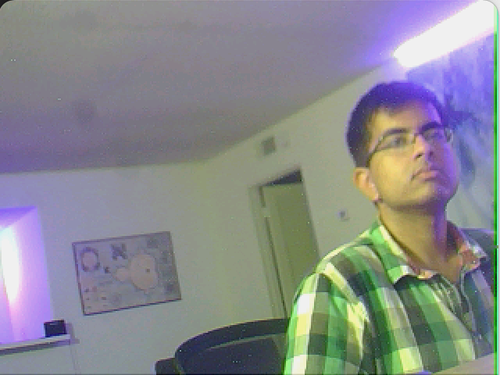

In [11]:
image = Image.open("me.png")
image.thumbnail((500, 500), Image.ANTIALIAS)
print("Image size:", image.size)

# Remove the alpha channel from a PNG because that is 
# what MTCNN wants
image = image.convert("RGB")


print("Image shape:", numpy.array(image).shape)
image

## Load the model

* Documentation on MTCNN class is available on directly in the code. See [mtcnn.py on GitHub](https://github.com/timesler/facenet-pytorch/blob/master/models/mtcnn.py)

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Using", device)

mtcnn = MTCNN(select_largest=False, device=device)

Using cpu


## Inference
* Documentation at [MTCNN class](https://github.com/timesler/facenet-pytorch/blob/master/models/mtcnn.py#L157).

In [13]:
face = mtcnn(image)

Face is a <class 'torch.Tensor'>
Face shape: torch.Size([3, 160, 160])
Values range from [ tensor(-0.9180) , tensor(0.8945) ]


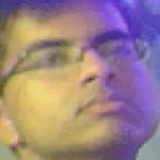

In [14]:
print("Face is a", type(face))
print("Face shape:", face.shape)

# Need to normalize the face
print("Values range from [", face.min(), ",", face.max(), "]")
normalizedFace = ((face + 1) / 2)

faceImage = transforms.ToPILImage()(normalizedFace)
display(faceImage)

## Bounding Box
* Documentation of `detect()` is at [detect() function in GitHub repo](https://github.com/timesler/facenet-pytorch/blob/master/models/mtcnn.py#L272).

In [15]:
box, prob, points = mtcnn.detect(image, landmarks=True)

Box: [[368.96402  101.172966 459.09528  211.20152 ]]
Probability: [0.99628437]
Point: [398.96143 141.89543]
Point: [434.95715 131.70763]
Point: [431.62173 148.58397]
Point: [416.32724 184.90692]
Point: [447.1428 175.5032]


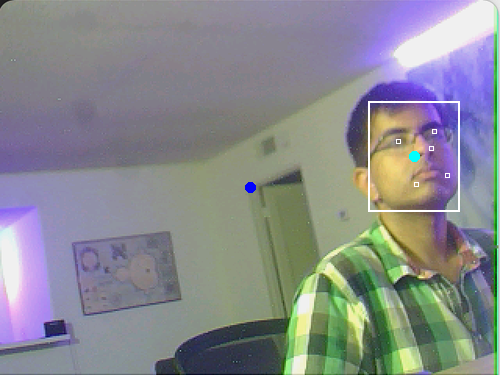

In [16]:
print("Box:", box)
print("Probability:", prob)

boxedImage = image.copy()
draw = ImageDraw.Draw(boxedImage)

# Draw rectangle
draw.rectangle(box[0], width=2)

# Draw points
for p in points[0]:
    print("Point:", p)
    draw.rectangle([p[0] - 2, p[1] - 2, p[0] + 2, p[1] + 2], width=1)


# Draw the center point of image
centerW = image.size[0] / 2
centerH = image.size[1] / 2
r = 5
draw.ellipse((centerW - r, centerH - r, centerW + r, centerH + r), fill=(0, 0, 255))

# Draw the center point of the box
faceW = box[0][0] + ((box[0][2] - box[0][0]) / 2)
faceH = box[0][1] + ((box[0][3] - box[0][1]) / 2)
r = 5
draw.ellipse((faceW - r, faceH - r, faceW + r, faceH + r), fill=(0, 255, 255))


display(boxedImage)


## Direction to send to Arduino

In [17]:
direction = (faceW - centerW) / (centerW)
print(direction)

0.6561185913085937


In [18]:
d = "LEFT" if (direction < 0) else "RIGHT"
print("This means face is towards", d, "by", "{0:.1%}".format(abs(direction)))

This means face is towards RIGHT by 65.6%
